In [105]:
from TRACE_module.motif import *
import TRACE_module.preprocessing as pp
from TRACE_module.descriptive_analysis import sort_stack_by_timesteps
import pandas as pd
import os 
import sys
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt

In [106]:
### Importation des paths à partir du .env
load_dotenv()
parent_dir_raw = os.getenv("parent_folder")
parent_dir = os.sep.join([parent_dir_raw])

output_dir_raw = os.getenv("output_dir")
output_dir = os.sep.join([output_dir_raw])

print(f"Data directory : {parent_dir} | Output dir : {output_dir}")

Data directory : ./data/data_Buisson | Output dir : ./savings


In [107]:
# Parsing de la liste des fichiers parquet
list_files = []
for f in os.listdir(parent_dir): 
    if f.endswith(".parquet") : 
        list_files.append(os.path.join(parent_dir,f))

len(list_files), list_files

(46,
 ['./data/data_Buisson/20241016-20241029_3ce9_glob_sensor_time_ble.parquet',
  './data/data_Buisson/20241016-20241029_3cea_glob_sensor_time_ble.parquet',
  './data/data_Buisson/20241016-20241029_3cf6_glob_sensor_time_ble.parquet',
  './data/data_Buisson/20241016-20241029_3cf8_glob_sensor_time_ble.parquet',
  './data/data_Buisson/20241016-20241029_3d06_glob_sensor_time_ble.parquet',
  './data/data_Buisson/20241016-20241029_3d08_glob_sensor_time_ble.parquet',
  './data/data_Buisson/20241016-20241029_3d0c_glob_sensor_time_ble.parquet',
  './data/data_Buisson/20241016-20241029_3d05_glob_sensor_time_ble.parquet',
  './data/data_Buisson/20241016-20241029_3ceb_glob_sensor_time_ble.parquet',
  './data/data_Buisson/20241016-20241029_3667_glob_sensor_time_ble.parquet',
  './data/data_Buisson/20241016-20241029_3669_glob_sensor_time_ble.parquet',
  './data/data_Buisson/20241016-20241029_3cfc_glob_sensor_time_ble.parquet',
  './data/data_Buisson/20241016-20241029_3cf5_glob_sensor_time_ble.parq

In [108]:
## Dossier pour enregistrer les données
if not  os.path.isdir(output_dir) : 
    os.makedirs(output_dir)

In [109]:
# Importation des données sous forme de dataframe pandas
data=pp.concatenate_df(list_files, smooth_time="20s")
list_id=list(pd.unique(data["accelero_id"]))

In [110]:
#Data_filtering Buisson 
start = "2024-10-16T15:00:00"
end = "2024-10-29T06:00:00"

data = data.loc[(data["glob_sensor_DateTime"] >= start) & (data["glob_sensor_DateTime"] <= end)]

In [111]:
data.shape, list_id

((15368933, 4),
 ['365d',
  '365e',
  '3660',
  '3662',
  '3663',
  '3664',
  '3665',
  '3666',
  '3667',
  '3668',
  '3669',
  '366a',
  '366b',
  '366c',
  '366d',
  '3cea',
  '3ceb',
  '3cec',
  '3ced',
  '3cee',
  '3cef',
  '3cf0',
  '3cf1',
  '3cf2',
  '3cf3',
  '3cf4',
  '3cf5',
  '3cf6',
  '3cf7',
  '3cf8',
  '3cf9',
  '3cfa',
  '3cfb',
  '3cfc',
  '3cfd',
  '3cfe',
  '3cff',
  '3d01',
  '3d02',
  '3d03',
  '3d04',
  '3d05',
  '3d06',
  '3d07',
  '3d08',
  '3d09',
  '3d0c',
  '3d0f',
  '3ce9'])

In [203]:
THRESH_DB = -65
stack_matrice, list_timestep = pp.create_stack(dataframe=data, list_id=list_id, threshold=THRESH_DB)
stack_matrice, list_timestep = sort_stack_by_timesteps(stack_matrice, list_timestep)

In [113]:

print(f"Dimensions du stack de matrice : {stack_matrice.shape}")
step = 0
while stack_matrice[step,:,:].sum() < 10 :
    step +=1
print(step)
stack_matrice[step,:,:]

Dimensions du stack de matrice : (54541, 49, 49)
0


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(49, 49))

In [114]:
test = stack_matrice[0]

Motif( 3660 -- 3cfa, 366c -- 3d04, 3ceb -- 3d05, 3cf3 -- 3d05, 3d01 -- 3d02, oriented : False)

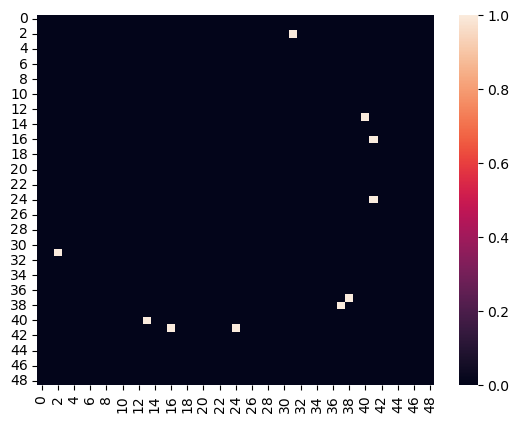

In [115]:
import seaborn as sns 
sns.heatmap(test)
test_motif = interaction_matrix_to_motif(test, list_id=list_id)
test_motif

In [116]:
(list_timestep == sorted(list_timestep)).sum(), len(list_timestep)

(np.int64(54541), 54541)

In [117]:
def stack_to_df_motif(stack, list_timestep, list_id): 
    list_motif = []
    for matrix in stack :
        list_motif.append(interaction_matrix_to_motif(matrix,list_id))
    return pd.DataFrame({"glob_sensor_DateTime" : list_timestep, "motif" : list_motif})

In [118]:
df_motif = stack_to_df_motif(stack_matrice, list_timestep, list_id)
df_motif

,glob_sensor_DateTime,motif
0,2024-10-16 15:00:00,"(3660 -- 3cfa, 366c -- 3d04, 3ceb -- 3d05, 3cf..."
1,2024-10-16 15:00:20,"(3660 -- 3cea, 3662 -- 3668, 3663 -- 3cea, 366..."
2,2024-10-16 15:00:40,"(3663 -- 3cea, 366a -- 3cea, 366c -- 3d04, 3ce..."
3,2024-10-16 15:01:00,"(3662 -- 3668, 3668 -- 3d0c, 366c -- 3d04, 366..."
4,2024-10-16 15:01:20,"(3663 -- 366a, 3667 -- 3d08, 366c -- 3d04, 3cf..."
...,...,...
54536,2024-10-29 05:58:40,"(366c -- 3cf0, 3cf0 -- 3cff)"
54537,2024-10-29 05:59:00,"(3ced -- 3d08, 3cf7 -- 3cfd)"
54538,2024-10-29 05:59:20,()
54539,2024-10-29 05:59:40,(3cf0 -- 3cff)


In [119]:
from collections import Counter


counts_motif = Counter()
for motif in df_motif["motif"] : 
    components = motif.connected_components()
    for comp in components :
        counts_motif[comp] +=1 

In [120]:
list_connected_components = list(counts_motif.keys())

In [121]:
MAX_SIZE_CONNECTED = pd.Series([len(motif) for motif in list_connected_components]).max()
MAX_SIZE_CONNECTED

np.int64(12)

In [122]:
dict_motif_by_size = dict((i,[])  for i in range(MAX_SIZE_CONNECTED+1))

for comp in list_connected_components : 
    dict_motif_by_size[len(comp)].append(comp)

dict_motif_by_size

{0: [],
 1: [Motif( 3660 -- 3cfa, oriented : False),
  Motif( 366c -- 3d04, oriented : False),
  Motif( 3d01 -- 3d02, oriented : False),
  Motif( 3662 -- 3668, oriented : False),
  Motif( 3ceb -- 3cfd, oriented : False),
  Motif( 3cf3 -- 3d05, oriented : False),
  Motif( 3cf6 -- 3d08, oriented : False),
  Motif( 3cf8 -- 3d01, oriented : False),
  Motif( 366d -- 3ceb, oriented : False),
  Motif( 3663 -- 366a, oriented : False),
  Motif( 3667 -- 3d08, oriented : False),
  Motif( 3cf6 -- 3cf9, oriented : False),
  Motif( 3cf0 -- 3cf6, oriented : False),
  Motif( 3cf1 -- 3d08, oriented : False),
  Motif( 3cec -- 3cfc, oriented : False),
  Motif( 3665 -- 3cf2, oriented : False),
  Motif( 366d -- 3cf4, oriented : False),
  Motif( 3cea -- 3cfa, oriented : False),
  Motif( 365d -- 3cfa, oriented : False),
  Motif( 3cfe -- 3ce9, oriented : False),
  Motif( 3669 -- 3cfd, oriented : False),
  Motif( 366d -- 3d05, oriented : False),
  Motif( 3666 -- 3ceb, oriented : False),
  Motif( 365e -- 3cf1, 

In [123]:
motif_by_vaches = dict((vaches,[]) for vaches in list_id)
for motif in list_connected_components :
    for vache in motif.get_nodes() : 
        motif_by_vaches[vache].append(motif)

In [124]:
len(motif_by_vaches["3663"])

1119

In [125]:
df_counts_motif = pd.DataFrame({"motif" : counts_motif.keys(), "counts": counts_motif.values()})

In [126]:
MIN_NB_INTER = 5
df_multiple_inter = df_counts_motif[df_counts_motif["counts"] >= MIN_NB_INTER]
df_multiple_inter

,motif,counts
0,(3660 -- 3cfa),247
1,(366c -- 3d04),426
3,(3d01 -- 3d02),222
5,(3662 -- 3668),111
6,(3ceb -- 3cfd),392
...,...,...
21450,"(3cea -- 3cfe, 3cfe -- 3d0f)",14
21462,"(3cee -- 3cff, 3cee -- 3d08, 3cf0 -- 3cff)",5
21481,"(3cee -- 3cf0, 3cee -- 3cff, 3cf0 -- 3cff)",5
21511,"(365e -- 3d08, 3ced -- 3d08)",5


In [127]:
count_motif_without_single_edge = dict((k,counts_motif[k]) for k in counts_motif if len(k) > 1)
df_count_motif_without_single_edge = pd.DataFrame({"motif" : count_motif_without_single_edge.keys(), "counts": count_motif_without_single_edge.values()})

In [128]:
MIN_NB_INTER = 5
df_multiple_inter_wse = df_count_motif_without_single_edge[df_count_motif_without_single_edge["counts"] >= MIN_NB_INTER]

In [129]:
### Analyse voisins 3663
vache = "3663"


In [130]:
motif_by_vaches_wse = dict((vaches,[]) for vaches in list_id)
for motif in list_connected_components :
    if len(motif) == 1 : 
        continue
    for vache in motif.get_nodes() : 
        motif_by_vaches_wse[vache].append(motif)

In [131]:
len(motif_by_vaches_wse[vache])

888

## Approche par masque sur les composantes connexes

L'objectif de cette partie est dans un premier temps de faire le tri dans l'ensemble des motifs connexes pour enlever les motifs qui apparaissent une seule fois dans tout le datasets et qui ne sont pas des motifs récurrents.

Les motifs qui apparaissent une seule fois dans le dataset ne sont pas des motifs intéressants car ils ne sont pas réprésentatifs de la dynamique sociale des vaches.
L'objectif est de sortir des motifs récurrents dans le sens où ces groupes se forment à des instants différents.


In [132]:
def count_fuzzy_sequences_of_ones(arr, max_gap=1):
    """
    Compte le nombre de séquences de 1 en considérant qu'une interruption 
    de `max_gap` zéros ne casse pas la continuité.

    Args:
        arr (np.array): Tableau 1D contenant des 0 et des 1.
        max_gap (int): Nombre maximum de 0 autorisés à l'intérieur d'une séquence de 1.

    Returns:
        int: Nombre de séquences considérées comme continues.
    """
    # Récupérer les indices où il y a des 1
    ones_indices = np.where(arr == 1)[0]

    if len(ones_indices) == 0:
        return 0  # Aucun 1 dans le tableau

    # Compter les groupes en vérifiant les écarts entre indices
    count = 1  # Au moins une séquence détectée
    for i in range(1, len(ones_indices)):
        if (ones_indices[i] - ones_indices[i - 1]) > (max_gap + 1):
            count += 1  # Nouvelle séquence détectée
    
    return count


In [133]:
def mat_stack_to_list_connected_components(stack, list_id) :
    """Fonction qui à partir du stack de matrice d'adjacence permet de sortir la liste des composantes connexes à chaque time step

    Args:
        stack (np.nd_array): Stack des matrices d'adjacence
        list_id (list[str]): list des id des vaches

    Returns:
        list[list[Motif]]: Liste des composantes connexes à chaque timestep
    """
    list_connected = []
    for matrix in stack :
        list_comp = interaction_matrix_to_motif(matrix,list_id).connected_components()
        list_connected.append(list_comp)
    return list_connected

In [134]:
list_connected_per_ts = mat_stack_to_list_connected_components(stack_matrice, list_id)

In [135]:
len(stack_matrice), len(list_connected_per_ts)

(54541, 54541)

In [136]:
def mask_connected_comp(motif, list_connected_per_ts):
    """Fonction qui permet de sortir le mask d'apparition d'un motif"""
    mask = []
    for list_comp in list_connected_per_ts : 
        for motif_comp in list_comp : 
            if motif.is_subgraph(motif_comp) : 
                submotif = True
            else :
                submotif = False
        if motif in list_comp or submotif :
            mask.append(1)
        else :
            mask.append(0)
    return np.array(mask)

In [137]:
from collections import Counter

counts_motif = Counter()
for motif in df_motif["motif"] : 
    components = motif.connected_components()
    for comp in components :
        counts_motif[comp] +=1 

In [138]:
len(counts_motif)

21520

In [139]:
print(f"Max counts : {counts_motif.most_common(1)[0][1]} | {counts_motif.most_common(1)[0][0]}")

Max counts : 900 | Motif( 3d03 -- 3d04, oriented : False)


In [140]:
counts_motif.most_common(10)

[(Motif( 3d03 -- 3d04, oriented : False), 900),
 (Motif( 3cff -- 3d06, oriented : False), 851),
 (Motif( 3cf0 -- 3cf7, oriented : False), 849),
 (Motif( 3cfe -- 3d01, oriented : False), 842),
 (Motif( 365e -- 3cf0, oriented : False), 803),
 (Motif( 3669 -- 3d04, oriented : False), 793),
 (Motif( 3667 -- 3ced, oriented : False), 746),
 (Motif( 3cfc -- 3cff, oriented : False), 718),
 (Motif( 3ced -- 3d06, oriented : False), 676),
 (Motif( 3cea -- 3cee, oriented : False), 672)]

In [141]:
NB_MIN_INTER = 20

# Conversion en DataFrame les counts des composantes connexes
df_counts_motif = pd.DataFrame({"motif" : counts_motif.keys(), "counts" : counts_motif.values()})

filtered_counts = df_counts_motif[df_counts_motif["counts"] >= NB_MIN_INTER]

[Text(20, 0, '20'),
 Text(50, 0, '50'),
 Text(80, 0, '80'),
 Text(110, 0, '110'),
 Text(140, 0, '140'),
 Text(170, 0, '170'),
 Text(200, 0, '200'),
 Text(230, 0, '230'),
 Text(260, 0, '260'),
 Text(290, 0, '290'),
 Text(320, 0, '320'),
 Text(350, 0, '350'),
 Text(380, 0, '380'),
 Text(410, 0, '410'),
 Text(440, 0, '440'),
 Text(470, 0, '470'),
 Text(500, 0, '500'),
 Text(530, 0, '530'),
 Text(560, 0, '560'),
 Text(590, 0, '590'),
 Text(620, 0, '620'),
 Text(650, 0, '650'),
 Text(680, 0, '680'),
 Text(710, 0, '710'),
 Text(740, 0, '740'),
 Text(770, 0, '770'),
 Text(800, 0, '800'),
 Text(830, 0, '830'),
 Text(860, 0, '860'),
 Text(890, 0, '890')]

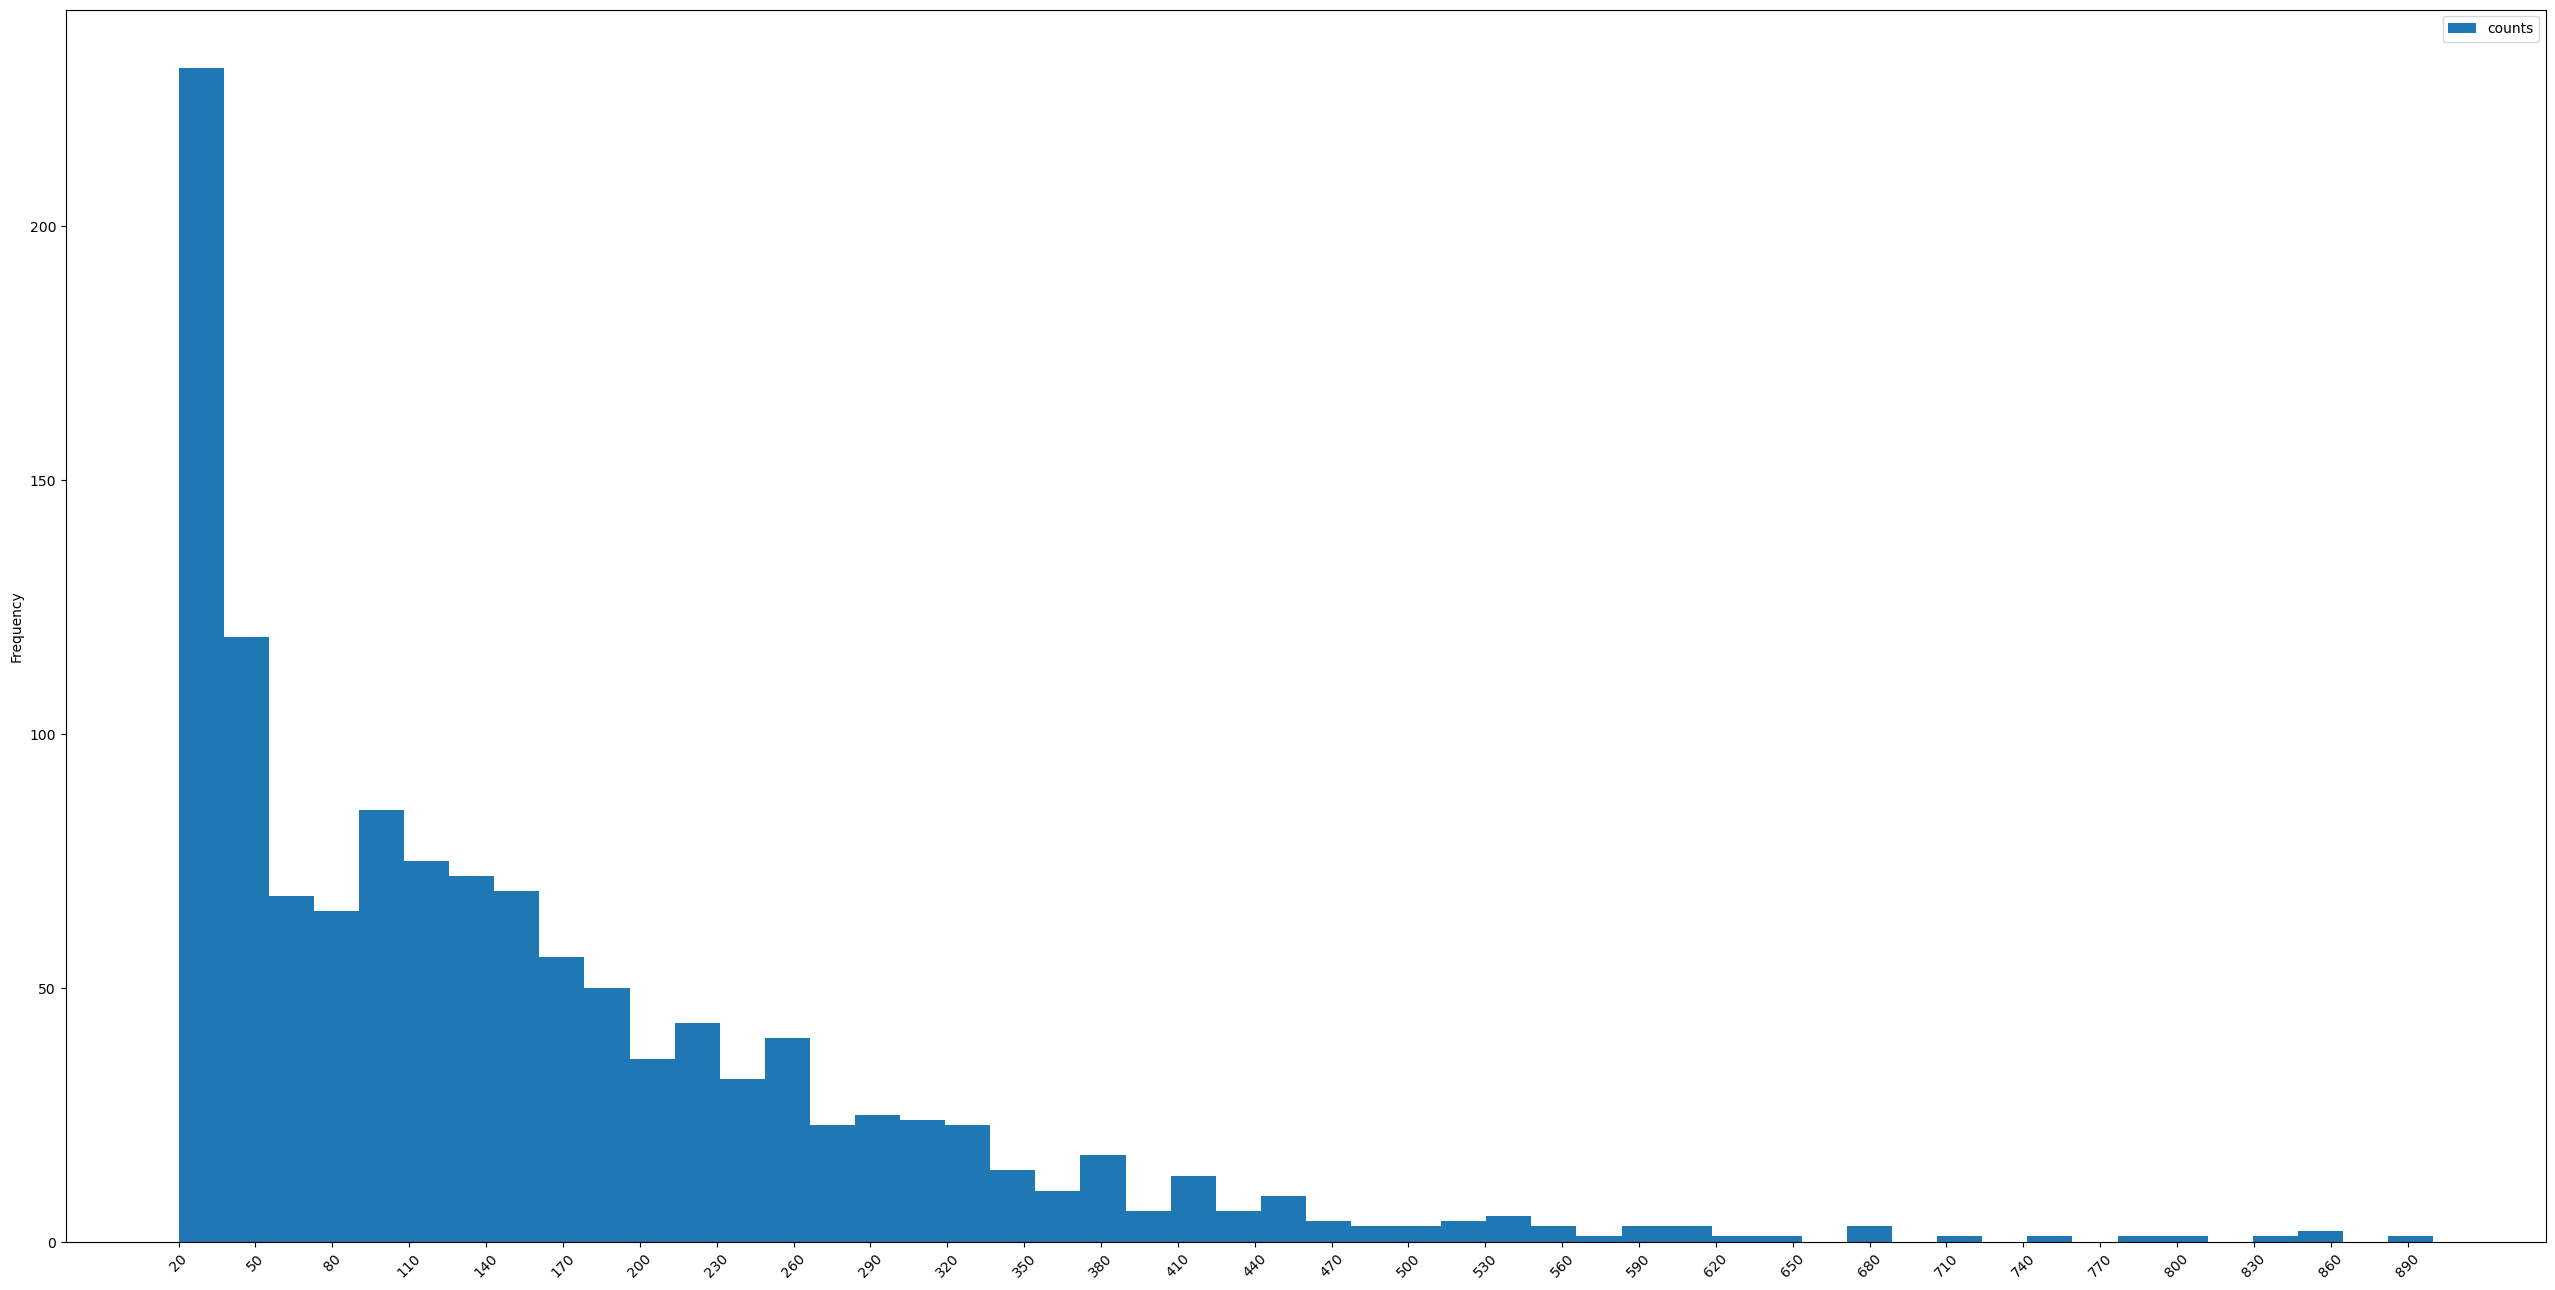

In [142]:
# filtered_counts.plot(kind="hist", bins = 50, figsize=(32,16))

# Créer l'histogramme
ax = filtered_counts.plot(kind="hist", bins = 50, figsize=(32,16))

# Régler les ticks de l'axe x
ax.set_xticks(np.arange(NB_MIN_INTER, filtered_counts["counts"].max() , 30))  # Ticks tous les 50
ax.set_xticklabels(np.arange(NB_MIN_INTER, filtered_counts["counts"].max() , 30), rotation=45)  # Labels avec rotation


In [143]:
list_connected_components = list(counts_motif.keys())

In [144]:
def masks_all_components(list_connected_components, list_connected_per_ts):
    masks = dict()
    for comp in tqdm(list_connected_components) : 
        masks[comp] = mask_connected_comp(comp, list_connected_per_ts)
    return masks

In [145]:
masks_all_comp = masks_all_components(list(filtered_counts["motif"]), list_connected_per_ts)

100%|██████████| 1253/1253 [05:04<00:00,  4.11it/s]


In [146]:
df_masks = pd.DataFrame({"motif" : masks_all_comp.keys(), "mask" : masks_all_comp.values})

In [165]:
MAX_GAP = 10

def fuzzy_count_all_masks(masks_all_comp, max_gap):
    fuzzy_counts = dict()
    for comp,mask in masks_all_comp.items(): 
        fuzzy_counts[comp] = count_fuzzy_sequences_of_ones(mask, max_gap)
    return fuzzy_counts

fuzzy_counts = fuzzy_count_all_masks(masks_all_comp, MAX_GAP)
df_fuzzy_counts = pd.DataFrame({"motif" : fuzzy_counts.keys(), "fuzzy_counts" : fuzzy_counts.values()})

In [166]:
MIN_LEN_COMP = 2 
filtered_fuzzy_counts = dict((k, fuzzy_counts[k]) for k in fuzzy_counts.keys() if len(k) >= MIN_LEN_COMP)
df_filtered_fuzzy_counts = pd.DataFrame({"motif" : filtered_fuzzy_counts.keys(), "fuzzy_counts" : filtered_fuzzy_counts.values()})
df_filtered_fuzzy_counts.sort_values(by="fuzzy_counts", ascending=False, inplace=True)

In [167]:
motif_filtered = list(df_filtered_fuzzy_counts["motif"])
len(motif_filtered), motif_filtered

(245,
 [Motif( 366c -- 3cf0, 3cf0 -- 3cff, oriented : False),
  Motif( 3cea -- 3cf0, 3cf0 -- 3cff, oriented : False),
  Motif( 3cf0 -- 3cfd, 3cf9 -- 3cfd, oriented : False),
  Motif( 3cf0 -- 3cfd, 3cf0 -- 3cff, oriented : False),
  Motif( 366a -- 3cfe, 3cfe -- 3d01, oriented : False),
  Motif( 3cf0 -- 3d09, 3d04 -- 3d09, oriented : False),
  Motif( 3667 -- 3ced, 3668 -- 3ced, oriented : False),
  Motif( 3669 -- 366c, 366c -- 3d04, oriented : False),
  Motif( 3665 -- 3cfa, 3ceb -- 3cfa, oriented : False),
  Motif( 3669 -- 3cea, 3cea -- 3cfb, oriented : False),
  Motif( 3cf7 -- 3cfd, 3cf7 -- 3d06, oriented : False),
  Motif( 365d -- 3cfe, 3cfa -- 3cfe, oriented : False),
  Motif( 3cf4 -- 3d03, 3d03 -- 3d04, oriented : False),
  Motif( 3cef -- 3cf8, 3cf8 -- 3d01, oriented : False),
  Motif( 3662 -- 3cf1, 3cf0 -- 3cf1, oriented : False),
  Motif( 3ceb -- 3cf8, 3ceb -- 3cfd, oriented : False),
  Motif( 3ceb -- 3cec, 3ceb -- 3cf1, oriented : False),
  Motif( 365d -- 3ce9, 3d0f -- 3ce9, orien

In [171]:
cow_motif_filtered = set()
for group in motif_filtered : 
    cow_motif_filtered.update(group.get_nodes())

In [172]:
len(cow_motif_filtered)

46

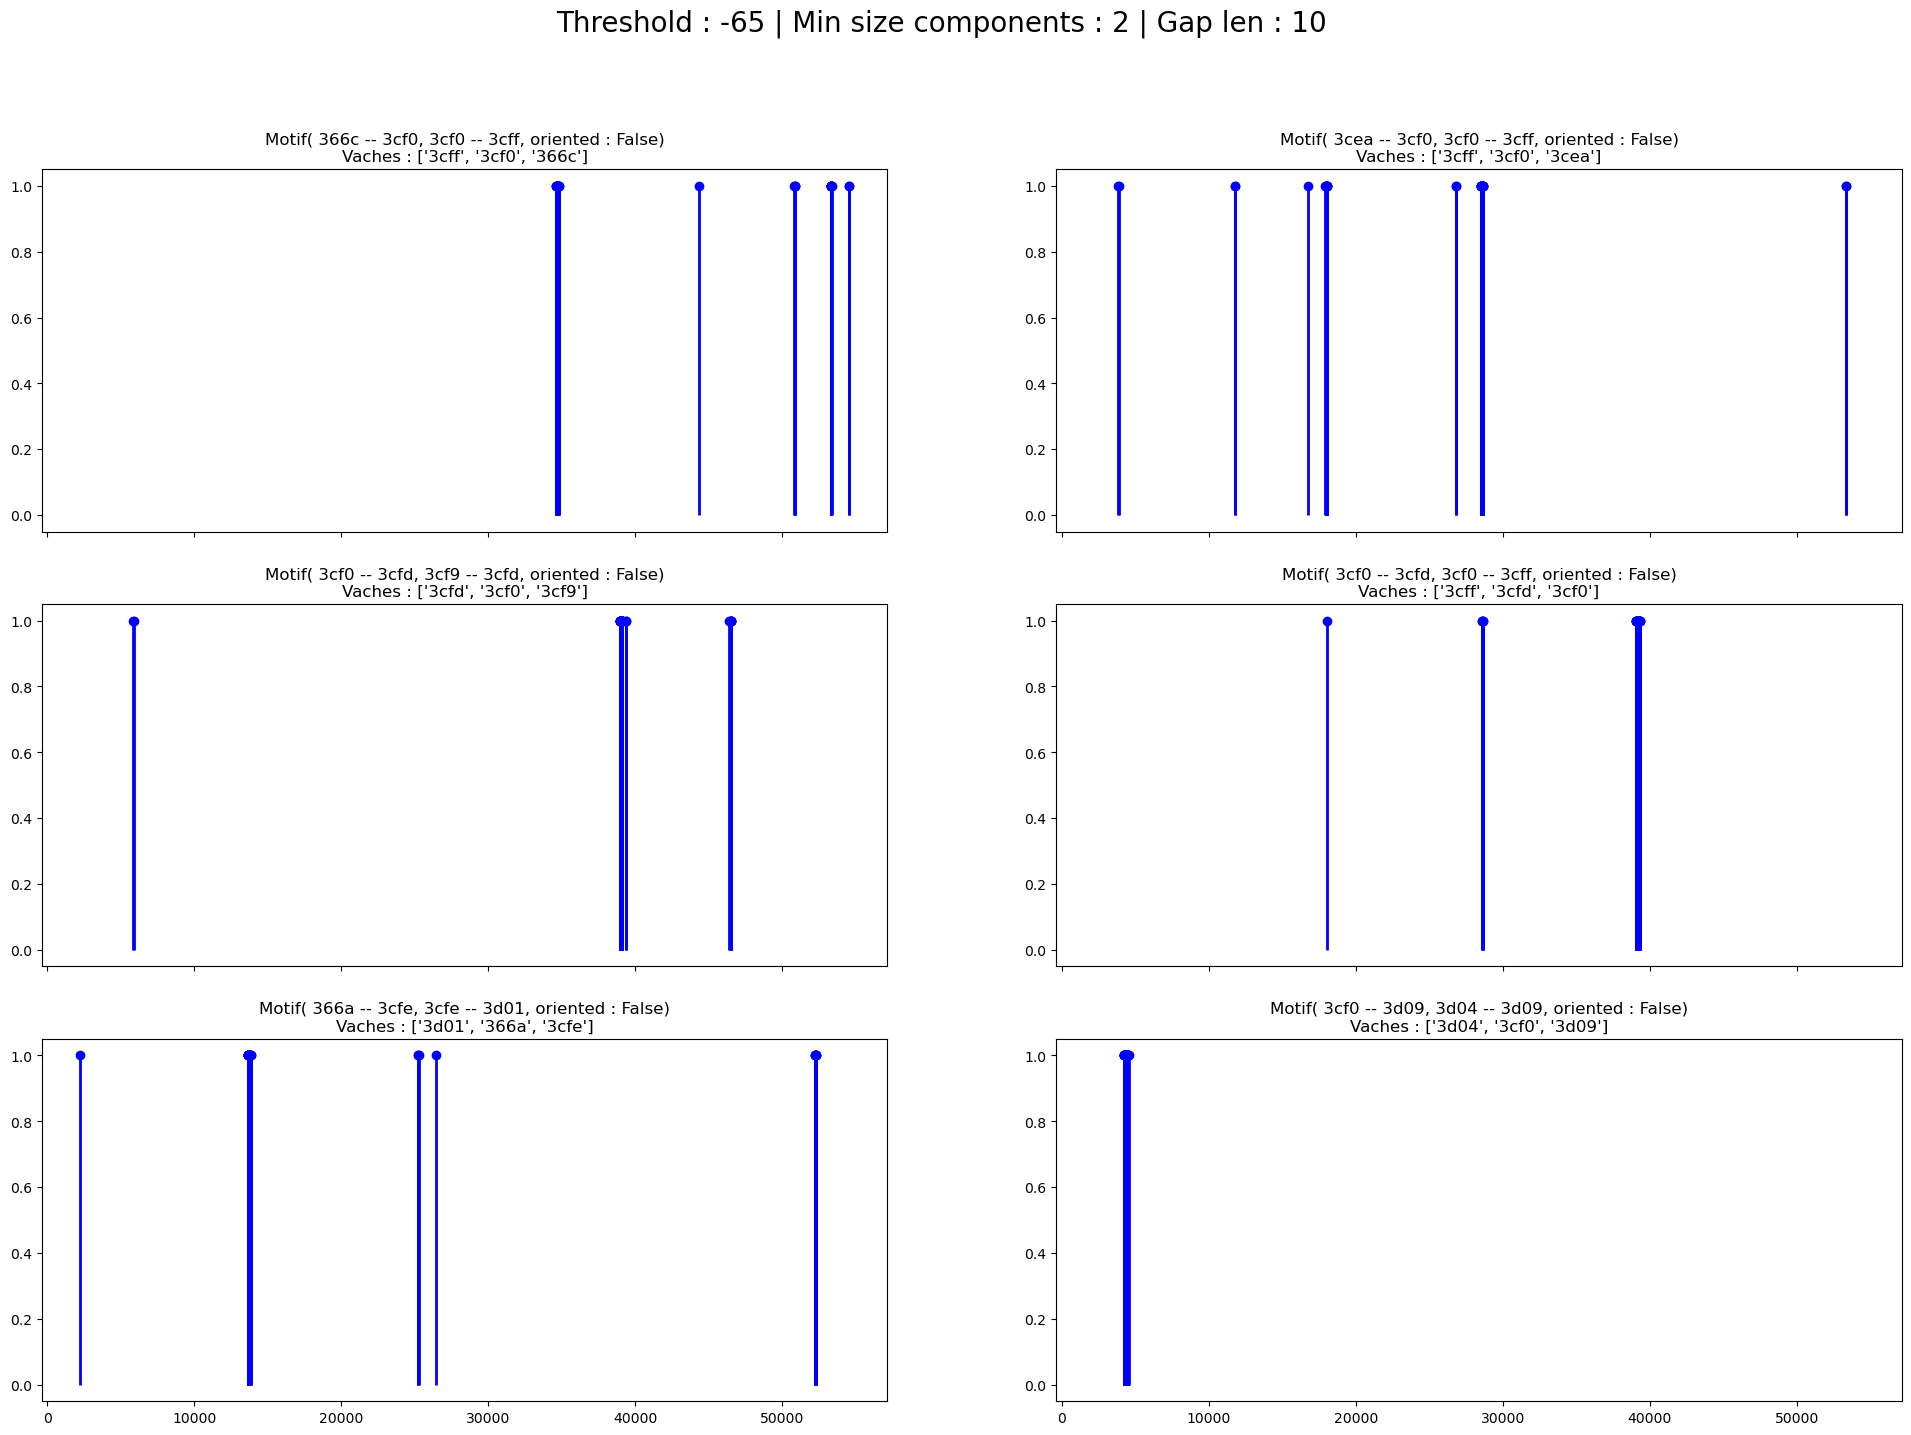

In [205]:
fig, axes = plt.subplots(3,2, figsize=(24,16), sharex=True)
fig.suptitle(f"Threshold : {THRESH_DB} | Min size components : {MIN_LEN_COMP} | Gap len : {MAX_GAP}", fontsize=20)
NB_TIMESTEP = len(masks_all_comp[motif_filtered[0]])
ticks = np.arange(0,NB_TIMESTEP, 100)
for ind,ax in enumerate(axes.ravel()):
    comp = motif_filtered[ind]
    mask_comp = masks_all_comp[comp]
    indices = np.where(mask_comp == 1)[0]
    ax.vlines(indices, ymin=0, ymax=1, color='b', lw=2)
    ax.scatter(indices, np.ones_like(indices), color='b', marker='o', label="1 détecté")
    ax.set_title(str(comp) + "\n" + f"Vaches : {str(comp.get_nodes())}" )

Motif( 3667 -- 3ced, 3668 -- 3ced, oriented : False)
14 [datetime.date(2024, 10, 16) datetime.date(2024, 10, 17)
 datetime.date(2024, 10, 18) datetime.date(2024, 10, 19)
 datetime.date(2024, 10, 20) datetime.date(2024, 10, 21)
 datetime.date(2024, 10, 22) datetime.date(2024, 10, 23)
 datetime.date(2024, 10, 24) datetime.date(2024, 10, 25)
 datetime.date(2024, 10, 26) datetime.date(2024, 10, 27)
 datetime.date(2024, 10, 28) datetime.date(2024, 10, 29)]


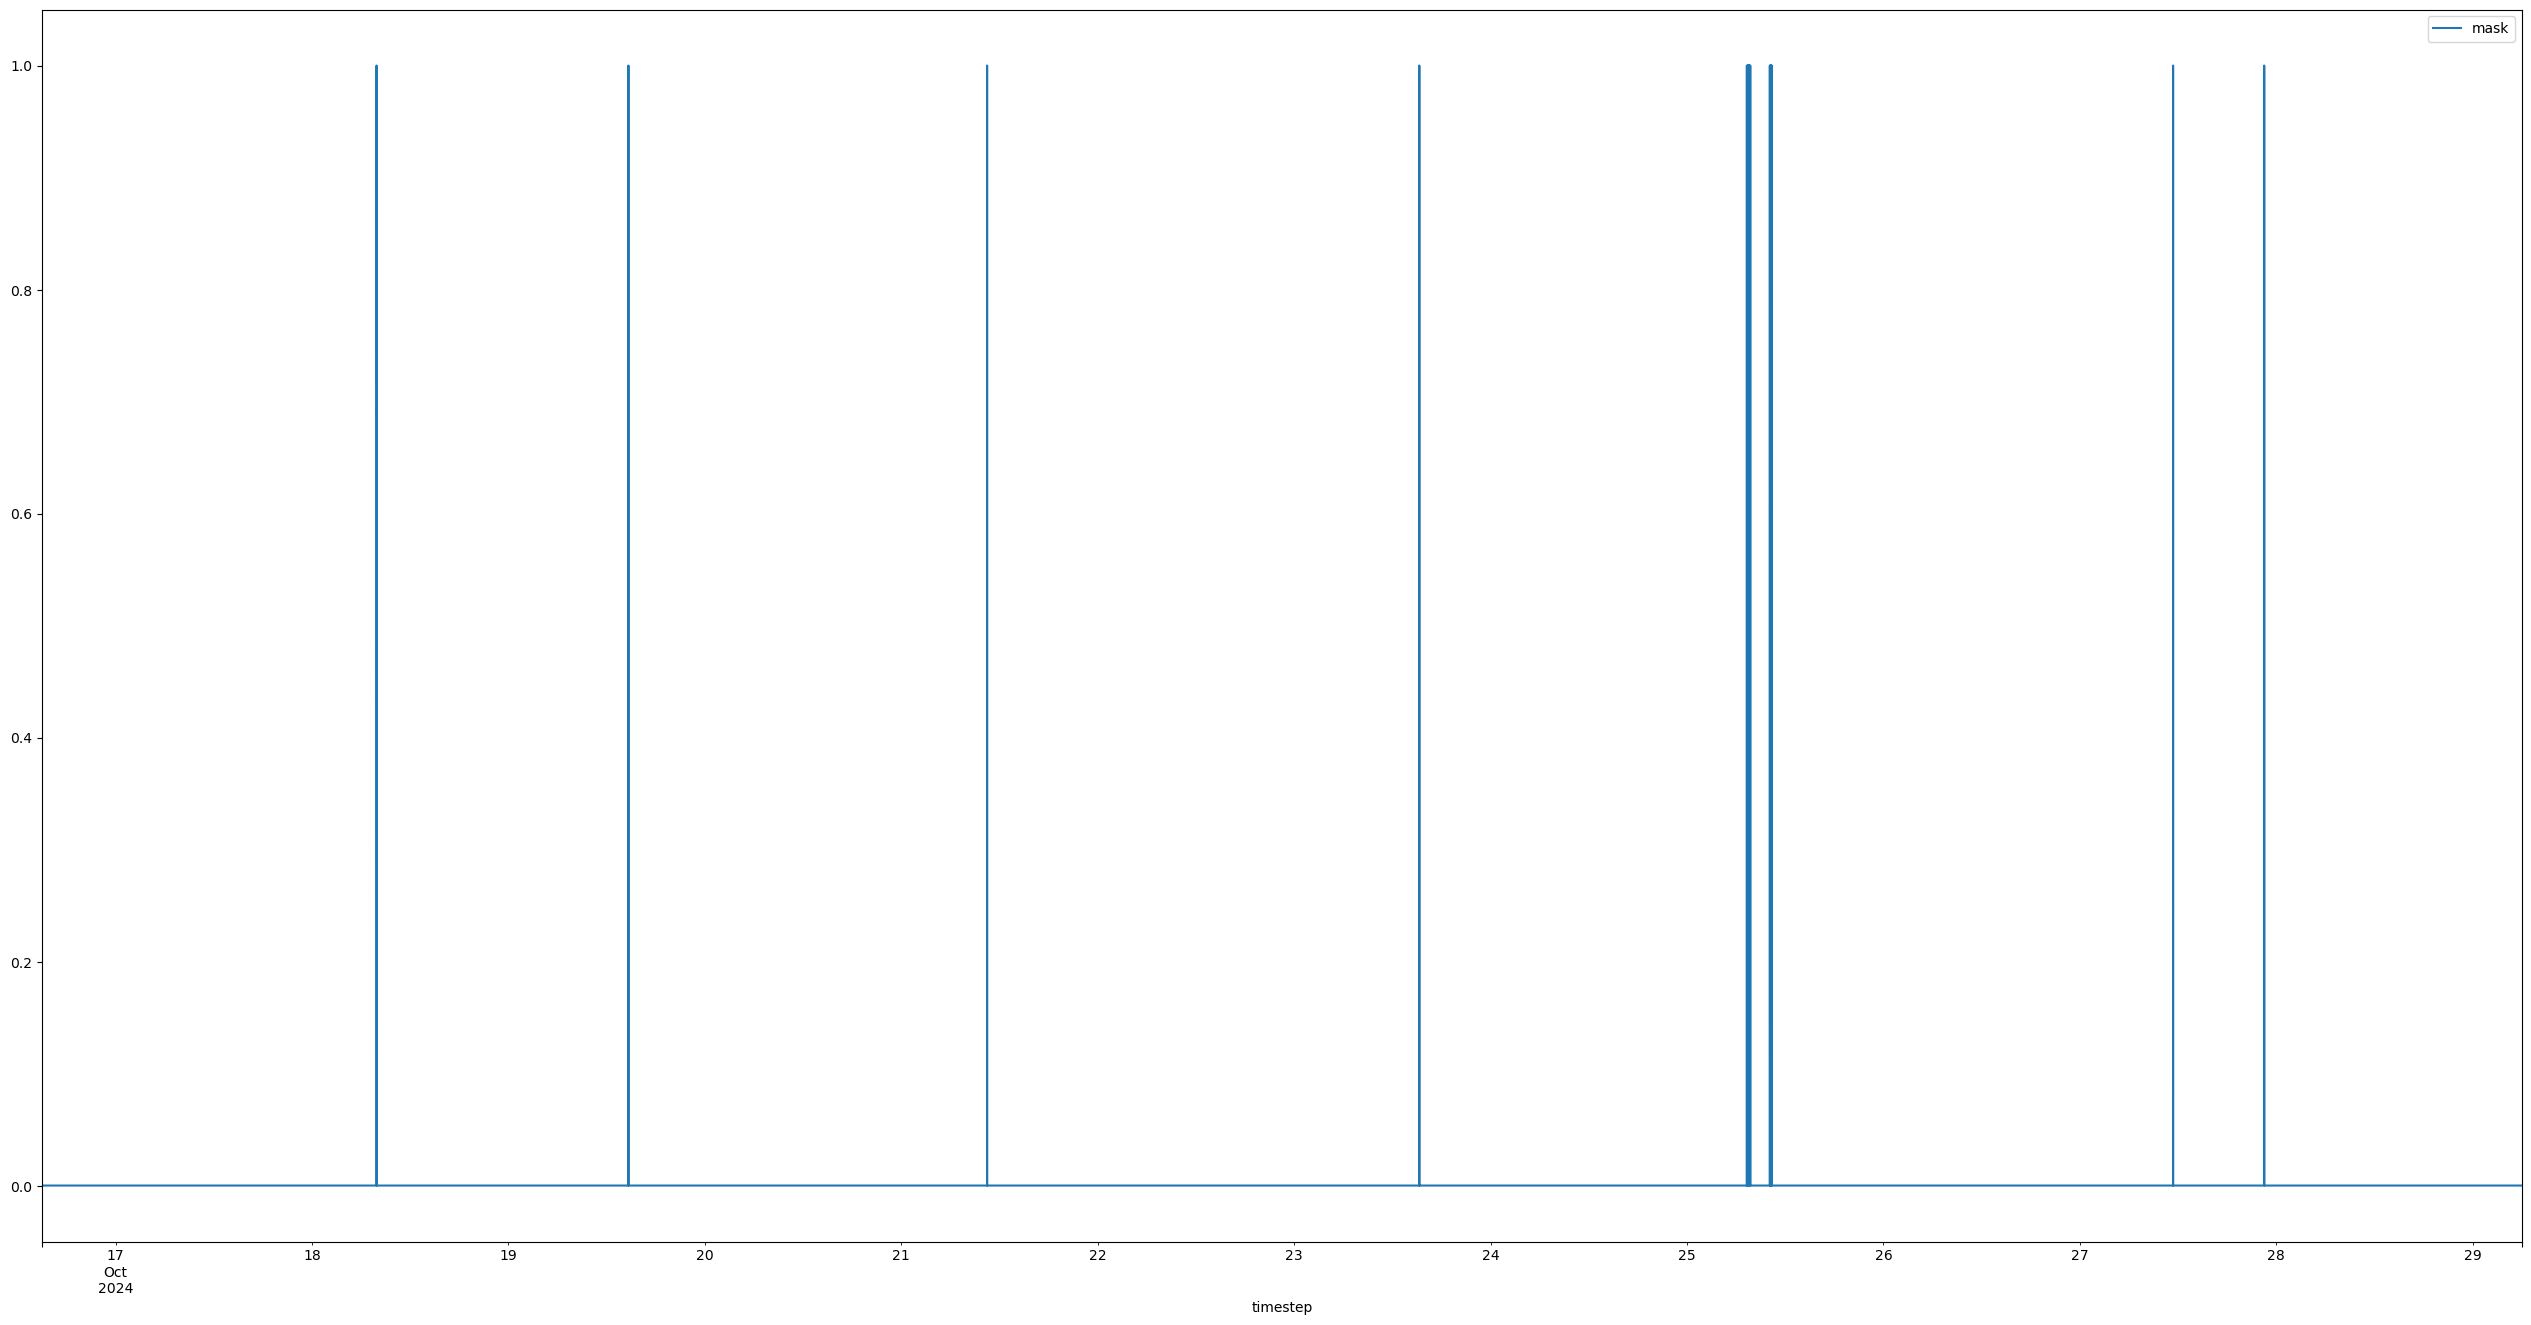

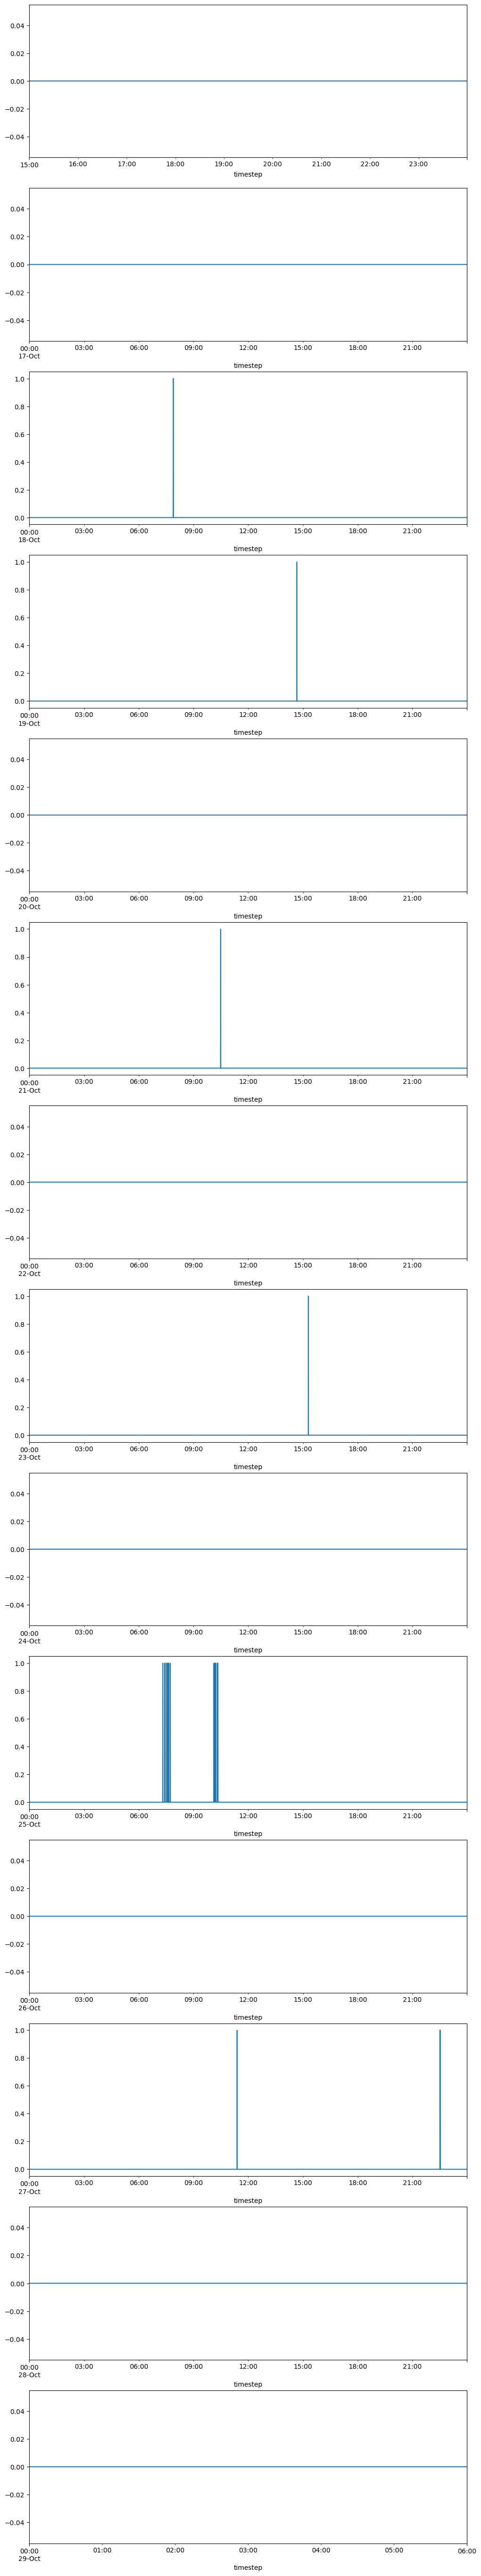

In [196]:
motif = motif_filtered[6]
mask_motif = masks_all_comp[motif]
print(motif)

df_mask_motif = pd.DataFrame({"timestep" : list_timestep, "mask" : mask_motif})
df_mask_motif.set_index("timestep").plot(figsize=(32,16))
df_mask_motif["date"] = df_mask_motif["timestep"].dt.date
days = pd.unique(df_mask_motif["date"])
print(len(days), days)

fig, axes = plt.subplots(len(days), 1)
fig.set(figheight= 5*len(days), figwidth= 12)
for ind,ax in enumerate(axes.ravel()) :
    day = days[ind]
    df_day = df_mask_motif[df_mask_motif["date"] == day]
    df_day.set_index("timestep")["mask"].plot(ax=ax)

Pas beaucoup d'interaction étalée dans le temps.
Cela dépend surement du threshold des décibels.
Ajouter un threshold trop grand masque l'apparation des motifs.


Idée pour pouvoir palier à ce problème.
Faire en sorte récuprer toutes les vaches avec lesquels elles ont intéragies --> En faire un gros motif.

Générer tous les sous motifs qui existent dans ce motif global

Comptage de chacun de ces motifs.

Vérifier leurs occurences dans le temps


In [151]:
FOCUS_VACHE = "3663"
one_cow_motifs = motif_by_vaches[FOCUS_VACHE]

In [152]:
## Get all the connected components in which a cow appears 
connected_components = set()
for motif in one_cow_motifs : 
    connected_components.update(motif.connected_components())
connected_components = list(connected_components)

In [153]:
set_neighbors = set() 
for motif in connected_components : 
    set_neighbors.update(motif.get_nodes())

In [154]:
len(set_neighbors)

47

In [155]:
max_len = 0 
for motif in connected_components : 
    if len(motif) > max_len :
        max_len = len(motif)
max_len

11

---

Analyse des interactions entre vaches (voir si il y a des vaches qui sont isolées)


In [156]:
list_ids = set(list_id) 


In [157]:
dict_neighbors = dict()
for vache,list_motif in motif_by_vaches.items(): 
    neighbors = set()
    for motif in list_motif : 
        neighbors.update(motif.get_nodes())
    dict_neighbors[vache] = neighbors

In [158]:
for vache, neigh in dict_neighbors.items() :
    print(f"{vache} : {len(neigh)} neighbors")

365d : 48 neighbors
365e : 47 neighbors
3660 : 48 neighbors
3662 : 48 neighbors
3663 : 47 neighbors
3664 : 48 neighbors
3665 : 48 neighbors
3666 : 48 neighbors
3667 : 48 neighbors
3668 : 48 neighbors
3669 : 48 neighbors
366a : 48 neighbors
366b : 0 neighbors
366c : 48 neighbors
366d : 48 neighbors
3cea : 48 neighbors
3ceb : 48 neighbors
3cec : 48 neighbors
3ced : 45 neighbors
3cee : 48 neighbors
3cef : 47 neighbors
3cf0 : 48 neighbors
3cf1 : 48 neighbors
3cf2 : 48 neighbors
3cf3 : 48 neighbors
3cf4 : 48 neighbors
3cf5 : 42 neighbors
3cf6 : 48 neighbors
3cf7 : 48 neighbors
3cf8 : 48 neighbors
3cf9 : 48 neighbors
3cfa : 48 neighbors
3cfb : 48 neighbors
3cfc : 48 neighbors
3cfd : 48 neighbors
3cfe : 48 neighbors
3cff : 48 neighbors
3d01 : 48 neighbors
3d02 : 48 neighbors
3d03 : 48 neighbors
3d04 : 45 neighbors
3d05 : 48 neighbors
3d06 : 48 neighbors
3d07 : 46 neighbors
3d08 : 48 neighbors
3d09 : 48 neighbors
3d0c : 48 neighbors
3d0f : 47 neighbors
3ce9 : 48 neighbors


Analyse de la densité des motifs


In [159]:
for motif in list_connected_components : 
    if len(motif) > 1 : 
        print(f"{motif} : {motif.density()}")

Motif( 3ceb -- 3d05, 3cf3 -- 3d05, oriented : False) : 0.6666666666666666
Motif( 3660 -- 3cea, 3663 -- 3cea, 3cea -- 3cfa, oriented : False) : 0.5
Motif( 3663 -- 3cea, 366a -- 3cea, 3cea -- 3cfa, oriented : False) : 0.5
Motif( 3662 -- 3668, 3668 -- 3d0c, oriented : False) : 0.6666666666666666
Motif( 3666 -- 3ce9, 3666 -- 3cfe, oriented : False) : 0.6666666666666666
Motif( 3660 -- 3cea, 3663 -- 366a, 3663 -- 3cea, oriented : False) : 0.5
Motif( 3cf0 -- 3cf6, 3cf0 -- 3d08, 3cf6 -- 3d08, oriented : False) : 1.0
Motif( 3cf0 -- 3cf6, 3cf0 -- 3d08, oriented : False) : 0.6666666666666666
Motif( 3ced -- 3cf0, 3cf0 -- 3cf6, 3cf0 -- 3d08, oriented : False) : 0.5
Motif( 3ced -- 3d08, 3cee -- 3cf0, 3cf0 -- 3cf6, 3cf6 -- 3d08, oriented : False) : 0.4
Motif( 3ced -- 3d08, 3cf0 -- 3cf6, 3cf0 -- 3d08, oriented : False) : 0.5
Motif( 3cf0 -- 3cf6, 3cf0 -- 3cf8, oriented : False) : 0.6666666666666666
Motif( 365d -- 365e, 365e -- 3cf1, 3667 -- 3cf1, oriented : False) : 0.5
Motif( 365e -- 3cf1, 3667 -- 3cf

In [160]:
list_all_arretes = set()
for id1 in list_id : 
    for id2 in list_id : 
        list_all_arretes.add(Arc(id1, id2, oriented = False))
max_motif = Motif(*list_all_arretes, oriented = False)


In [161]:
len(max_motif)

1225

In [162]:
filter_func = lambda m : m.is_connexe()
#list_submotifs = max_motif.gen_submotif(max_edges=10, filter_func=filter_func)

Ici on essaye de faire la transition des motifs que l'on détecte avec un threshold de -65 dans une analyse avec un threshold plus permissif
